# Data Cleaning

## Outline
0. Load and join dataframes
1. Handle missing values
   - Identify columns with missing data
   - Decide on appropriate strategies for each column
   - Impute or handle missing values as needed
2. Convert data types
   - Change 'start_date' to datetime format
   - Convert 'home_line_scores' and 'away_line_scores' to usable format
3. Handle outliers
   - Check for and address unrealistic values in numerical columns
4. Create derived features
   - Calculate point difference
   - Generate 'winner' column
   - Create time-based features from 'start_date'
5. Review and validate cleaned dataset

## Load Packages & Data

In [82]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the project root to the Python path
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(notebook_dir)
sys.path.append(project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.cleaning import (
    merge_and_clean_dataframes,
    visualize_null_values,
    clean_dataframe,
    analyze_distribution
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# Load the games data from the parquet file
games_df = pd.read_parquet('../data/games.parquet')

# Load the advanced team game stats from the parquet file
advanced_stats_df = pd.read_parquet('../data/advanced_team_game_stats.parquet')

# Load the team game stats from the parquet file
team_stats_df = pd.read_parquet('../data/team_game_stats.parquet')

# Load the team talent data from the parquet file
team_talent_df = pd.read_parquet('../data/team_talent.parquet')

## Join Data

In [32]:
# Use the function to merge and clean the dataframes
merged_df_final = merge_and_clean_dataframes(games_df, team_stats_df, advanced_stats_df, team_talent_df)

# Check the shape of the final dataframe
print("Shape of merged_df_final:", merged_df_final.shape)

df = merged_df_final.copy()

Shape of merged_df_final: (3430, 122)


## Handle Missing Values

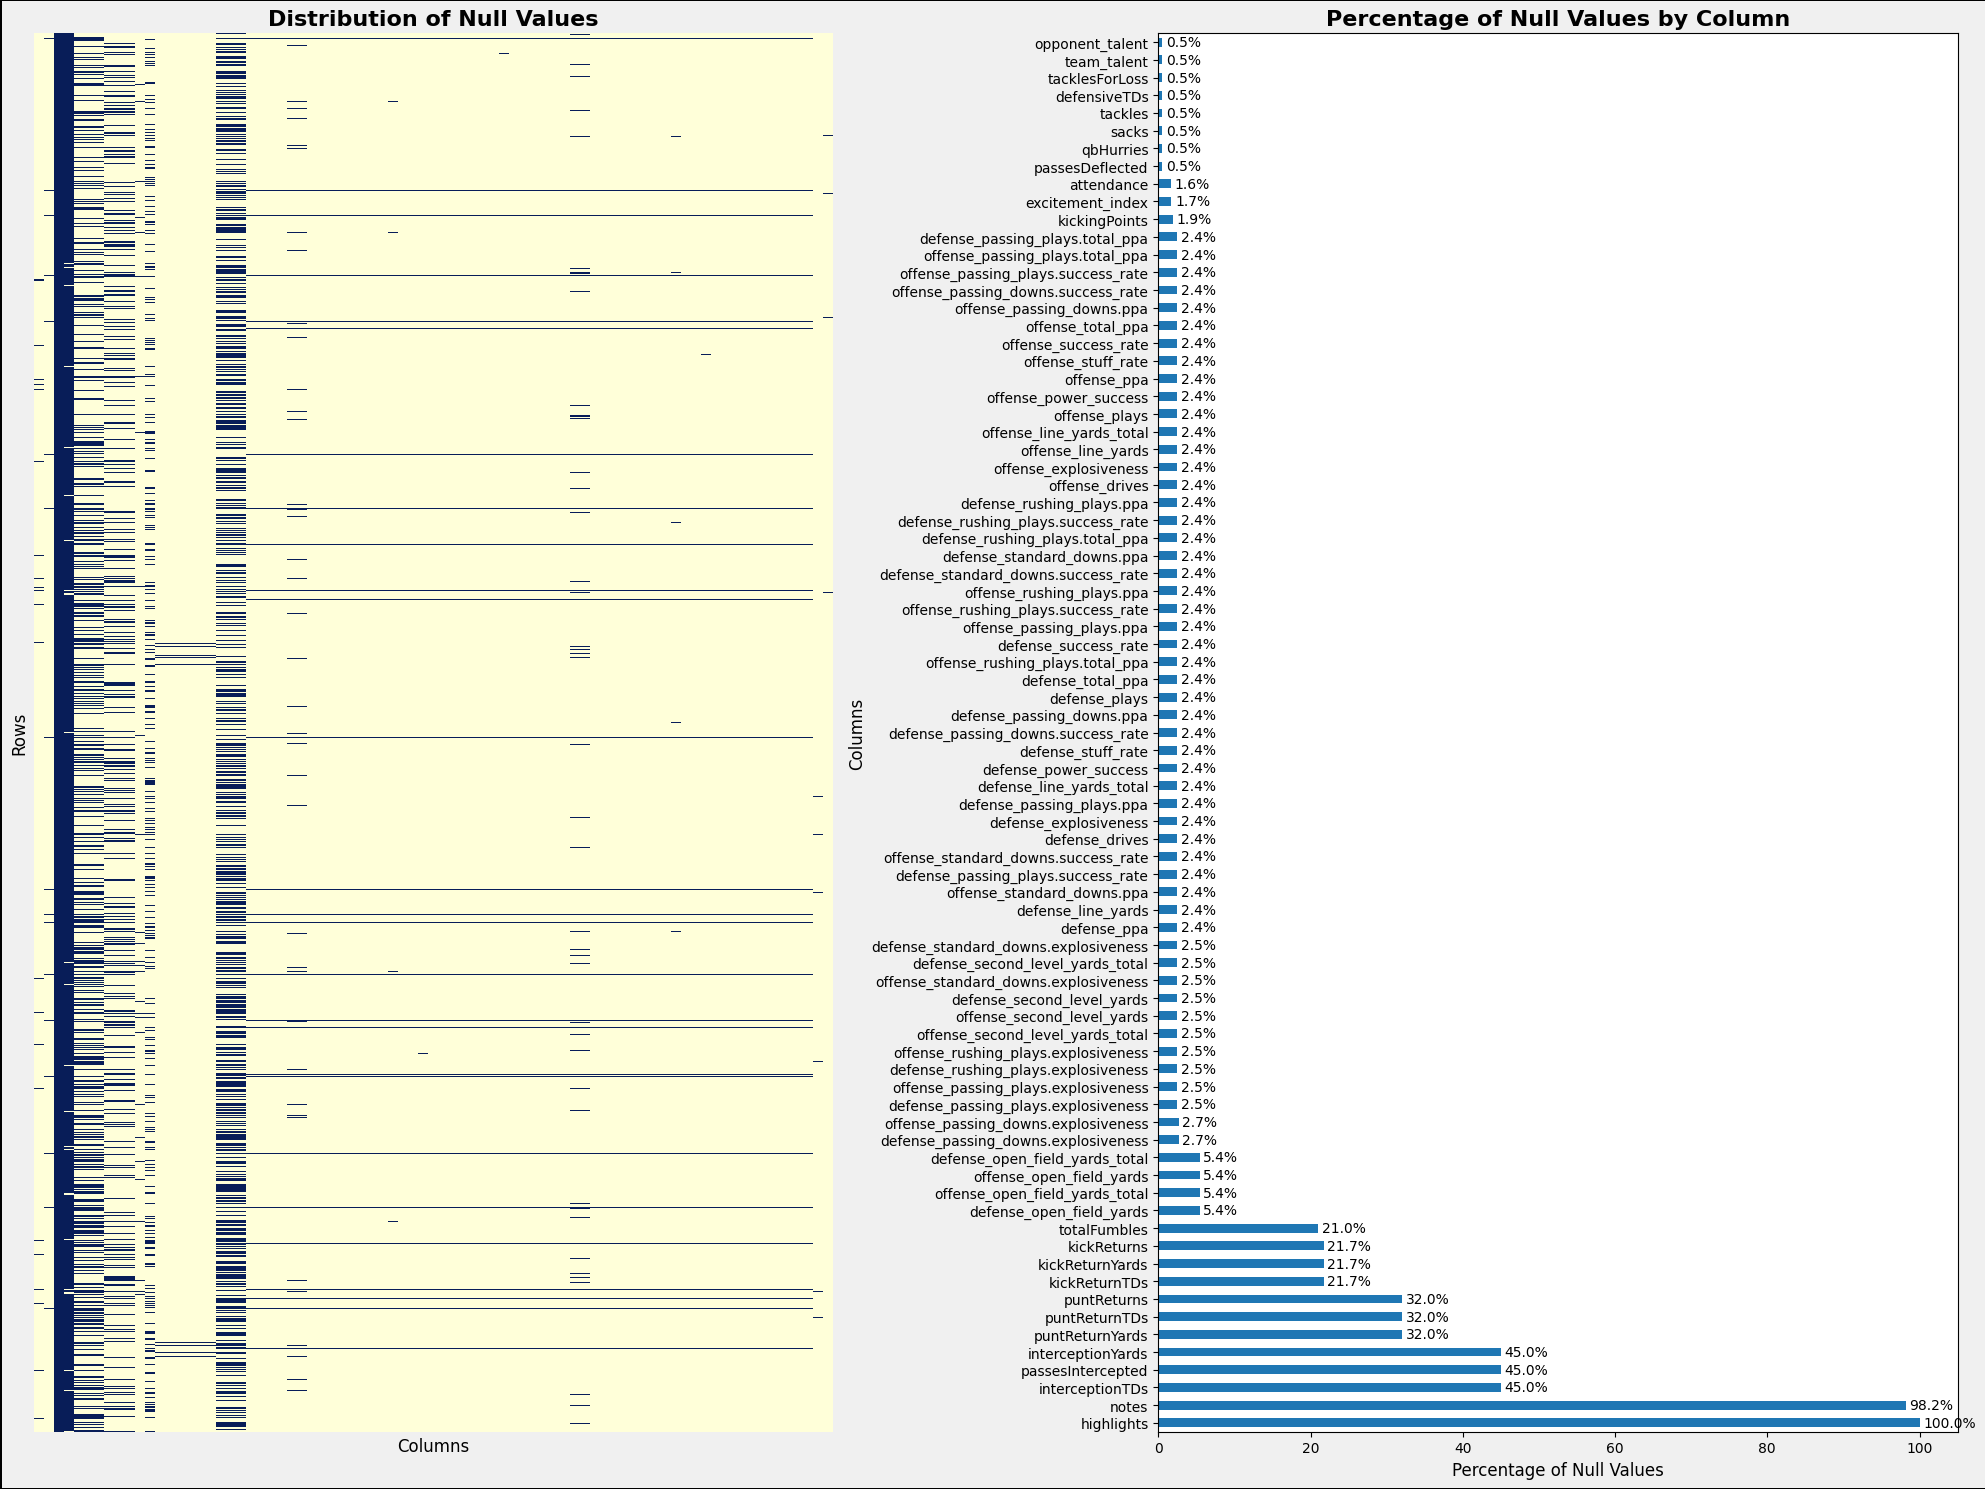

Columns with null values:
attendance: 56 null values (1.63%)
excitement_index: 58 null values (1.69%)
highlights: 3430 null values (100.00%)
notes: 3368 null values (98.19%)
puntReturnYards: 1099 null values (32.04%)
puntReturnTDs: 1099 null values (32.04%)
puntReturns: 1099 null values (32.04%)
kickReturnYards: 745 null values (21.72%)
kickReturnTDs: 745 null values (21.72%)
kickReturns: 745 null values (21.72%)
kickingPoints: 66 null values (1.92%)
totalFumbles: 720 null values (20.99%)
tacklesForLoss: 18 null values (0.52%)
defensiveTDs: 18 null values (0.52%)
tackles: 18 null values (0.52%)
sacks: 18 null values (0.52%)
qbHurries: 18 null values (0.52%)
passesDeflected: 18 null values (0.52%)
interceptionYards: 1543 null values (44.99%)
interceptionTDs: 1543 null values (44.99%)
passesIntercepted: 1543 null values (44.99%)
offense_drives: 84 null values (2.45%)
offense_explosiveness: 84 null values (2.45%)
offense_line_yards: 84 null values (2.45%)
offense_line_yards_total: 84 null

In [46]:
visualize_null_values(df)

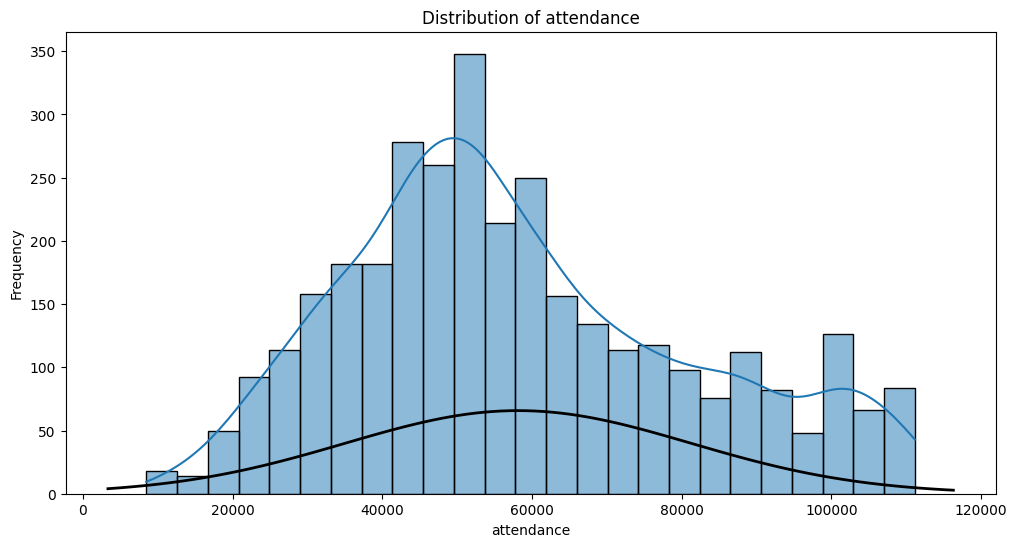

Shapiro-Wilk test - statistic: 0.9665, p-value: 0.0000
Skewness: 0.4750
Kurtosis: -0.4806


In [72]:
analyze_distribution(df, 'attendance')

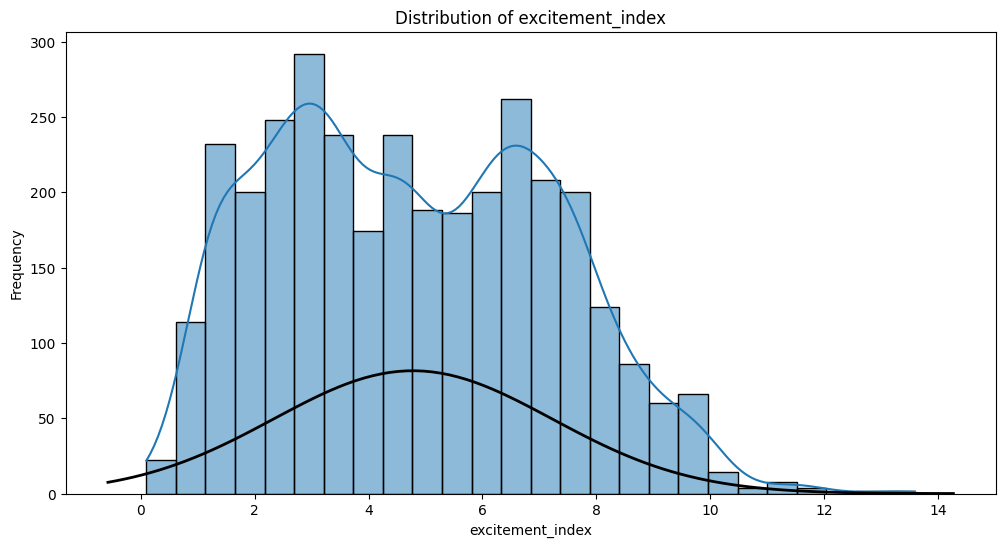

Shapiro-Wilk test - statistic: 0.9723, p-value: 0.0000
Skewness: 0.2729
Kurtosis: -0.7402


In [73]:
analyze_distribution(df, 'excitement_index')

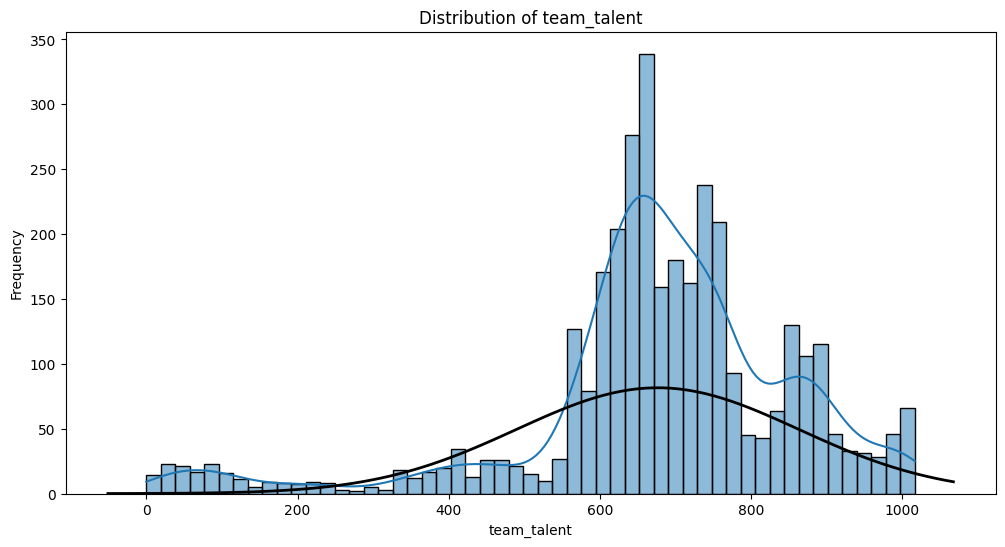

Shapiro-Wilk test - statistic: 0.8860, p-value: 0.0000
Skewness: -1.3172
Kurtosis: 2.8789


In [74]:
analyze_distribution(df, 'team_talent')

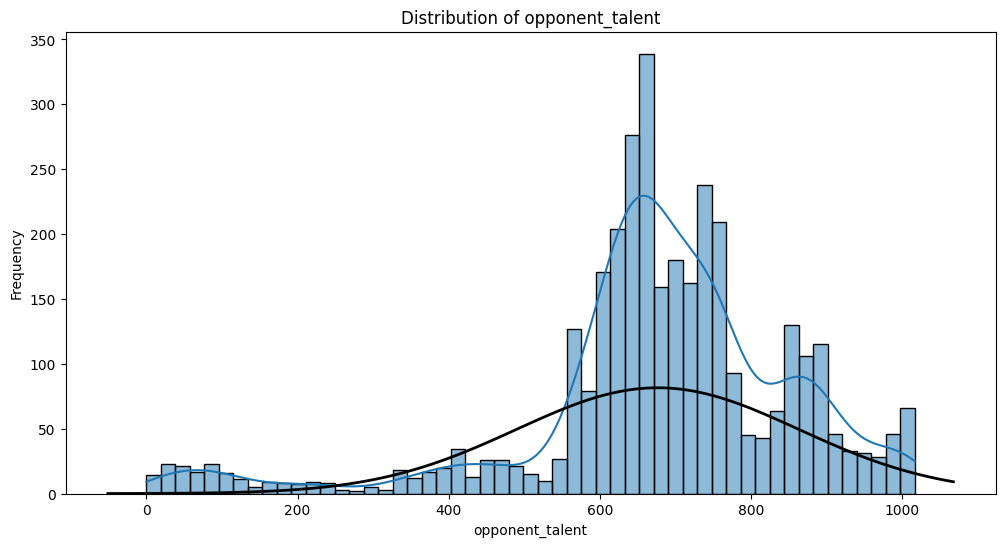

Shapiro-Wilk test - statistic: 0.8860, p-value: 0.0000
Skewness: -1.3172
Kurtosis: 2.8789


In [75]:
analyze_distribution(df, 'opponent_talent')

In [86]:
# Apply the cleaning function
cleaned_df = clean_dataframe(df)

# Check how many rows were removed
print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(cleaned_df)}")
print(f"Rows removed: {len(df) - len(cleaned_df)}")

# Check for any remaining null values
null_counts = cleaned_df.isnull().sum()
if null_counts.sum() > 0:
    print("\nColumns with remaining null values:")
    print(null_counts[null_counts > 0])
else:
    print("\nNo null values remaining in the dataset.")

Rows before cleaning: 3430
Rows after cleaning: 3346
Rows removed: 84

No null values remaining in the dataset.


/Users/colingaffney/repos/personal-projects/college_football_predictor/venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [90]:
# Save cleaned_df to root/data as clean_team_data.parquet

# Define the path for the data directory
data_dir = os.path.join(project_root, 'data')

# Save the cleaned DataFrame as a Parquet file
parquet_path = os.path.join(data_dir, 'clean_team_data.parquet')
cleaned_df.to_parquet(parquet_path, index=False)

print(f"Cleaned data saved to: {parquet_path}")

Cleaned data saved to: /Users/colingaffney/repos/personal-projects/college_football_predictor/data/clean_team_data.parquet


## Convert Data Types

In [89]:
# Display columns with 'object' data type
object_columns = cleaned_df.select_dtypes(include=['object']).columns
print("Columns with 'object' data type:")
for col in object_columns:
    print(f"- {col}")

Columns with 'object' data type:
- season_type
- start_date
- venue
- team
- team_division
- opponent
- opponent_conference
- opponent_division
- team_name
- team_conference
- home_away
- possessionTime
- totalPenaltiesYards
- completionAttempts
- fourthDownEff
- thirdDownEff
- result
